In [1]:
import numpy as np
import pandas as pd

In [2]:
df_survey = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Topic_Survey_Assignment.csv')
df_survey

Very interested  Somewhat interested  \
Big Data (Spark / Hadoop)              1332                  729   
Data Analysis / Statistics             1688                  444   
Data Journalism                         429                 1081   
Data Visualization                     1340                  734   
Deep Learning                          1263                  770   
Machine Learning                       1629                  477   

                            Not interested  
Big Data (Spark / Hadoop)              127  
Data Analysis / Statistics              60  
Data Journalism                        610  
Data Visualization                     102  
Deep Learning                          136  
Machine Learning                        74

In [3]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.2.2


In [4]:
df_survey.sort_values(by='Very interested', ascending=False, axis=0, inplace=True)
df_survey['Very interested'] = df_survey['Very interested']/2233
df_survey['Somewhat interested'] = df_survey['Somewhat interested']/2233
df_survey['Not interested'] = df_survey['Not interested']/2233

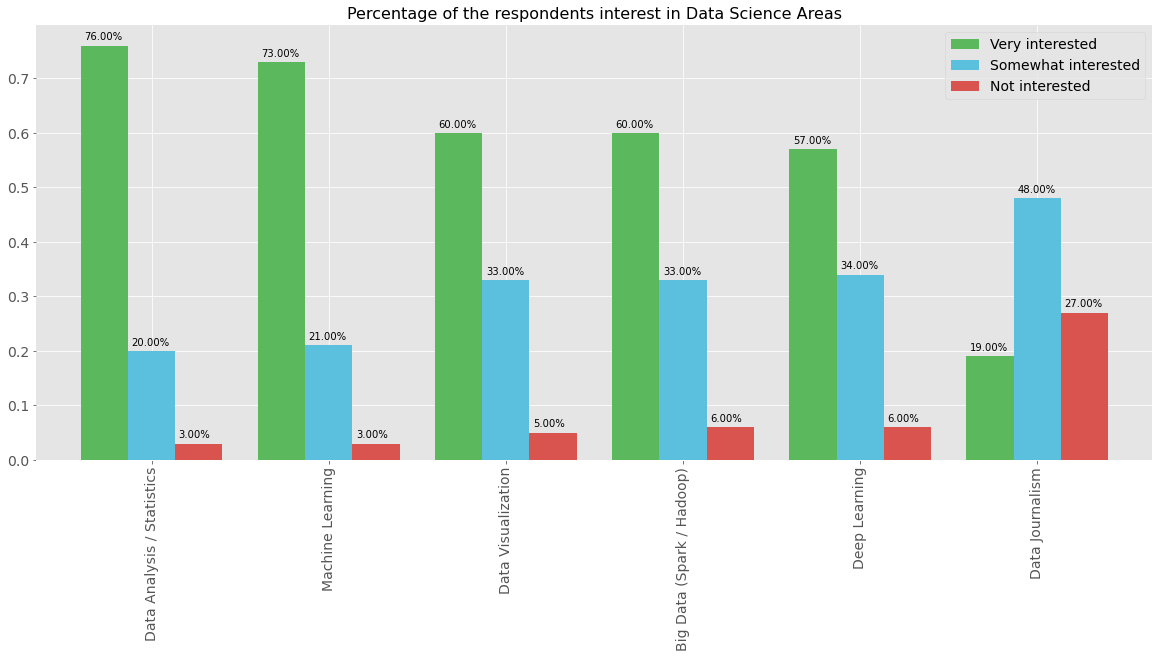

In [19]:
df_survey = df_survey.round(2)
#Plot
ax = df_survey.plot(kind='bar', figsize=(20, 8), width = 0.8,
                   color = ('#5cb85c', '#5bc0de', '#d9534f'),
                fontsize = 14)
ax.set_title('Percentage of the respondents interest in Data Science Areas', fontsize=16)
ax.legend(fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for p in ax.patches:
    ax.annotate("{:.2%}".format(p.get_height()),
                xy=(p.get_x()+0.02, p.get_height()+0.01))
    

In [41]:
for p in ax.patches:
    print (p.get_height(), p.get_x())

0.76 -0.4
0.73 0.6
0.6 1.6
0.6 2.6
0.57 3.6
0.19 4.6
0.2 -0.13333333333333333
0.21 0.8666666666666667
0.33 1.8666666666666667
0.33 2.8666666666666667
0.34 3.8666666666666667
0.48 4.866666666666666
0.03 0.1333333333333333
0.03 1.1333333333333333
0.05 2.1333333333333333
0.06 3.1333333333333333
0.06 4.133333333333333
0.27 5.133333333333333


Text(-0.1, 0.76, '0.76')

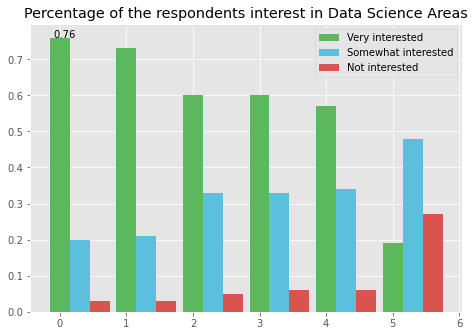

In [14]:
X = np.arange(6)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
width = 0.3
ax.bar(X + 0.0, list(map(float, df_survey.iloc[: ,0])), color = '#5cb85c', width = width)
ax.bar(X + 0.3, list(map(float, df_survey.iloc[: ,1])), color = '#5bc0de', width = width)
ax.bar(X + 0.6, list(map(float, df_survey.iloc[: ,2])), color = '#d9534f', width = width)
ax.set_title('Percentage of the respondents interest in Data Science Areas')
ax.legend(labels=['Very interested', 'Somewhat interested', 'Not interested'])
plt.text(-.1, 0.76, '0.76')

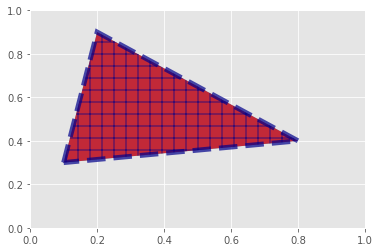

In [39]:
'''How to use patches in matplolib'''
# Ví dụ 1
import matplotlib.patches as patches
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca()
path = [
    [.1, .3],
    [.2, .9],
    [.8, .4],
]
ax.add_patch(patches.Polygon(path))
fig.savefig("patch.png")
# Ví dụ 2
ax.add_patch(patches.Polygon(
  path,
  alpha=.7,
  edgecolor="darkblue",
  facecolor="red",
  hatch="+",
  joinstyle="miter",
  linestyle="--",
  linewidth=5,
)) 

In [6]:
df_crime = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Police_Department_Incidents_-_Previous_Year__2016_.zip')
df_crime.head()
#df_crime ['Total'] = df_crime.sum(axis=1)
#df_crime.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

In [20]:
df_crime = df_crime.rename(columns = {'PdDistrict':'Neighborhood'})
df = df_crime['Neighborhood'].value_counts().rename_axis('Neighborhood').reset_index(name = 'Count')
df

Neighborhood  Count
0     SOUTHERN  28445
1     NORTHERN  20100
2      MISSION  19503
3      CENTRAL  17666
4      BAYVIEW  14303
5    INGLESIDE  11594
6      TARAVAL  11325
7   TENDERLOIN   9942
8     RICHMOND   8922
9         PARK   8699

In [9]:
!pip install folium
import folium
print('Folium installed and imported!')

     |████████████████████████████████| 93 kB 1.9 MB/s eta 0:00:011
Folium installed and imported!


In [10]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [11]:
!wget -- https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/san-francisco.geojson
print ('Downloaded')

--2020-11-21 17:31:42--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/san-francisco.geojson
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492672 (481K) [binary/octet-stream]
Saving to: ‘san-francisco.geojson’

san-francisco.geojs 100%[===================>] 481.12K  --.-KB/s    in 0.01s   

2020-11-21 17:31:42 (38.6 MB/s) - ‘san-francisco.geojson’ saved [492672/492672]

Downloaded


In [ ]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_crime.Y, df_crime.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [21]:
san_geo = r'san-francisco.geojson'
# let Folium determine the scale.
san_map = folium.Map(location=[37.77, -122.42], zoom_start=12)
san_map.choropleth(
    geo_data=san_geo,
    data=df,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)
san_map

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
